In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [8]:
# Load dataset
file_path = "normalized_weather_data.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day

# Select relevant columns for air quality analysis
air_quality_cols = ['last_updated', 'year', 'month', 'day', 'country', 'location_name',
                    'air_quality_PM2.5', 'air_quality_PM10', 'temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']
df_filtered = df[air_quality_cols].dropna()

<Figure size 1200x600 with 0 Axes>

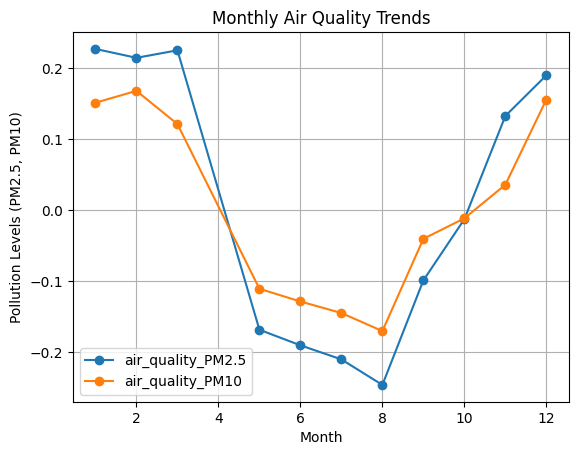

In [9]:
# 1️⃣ Air Quality Time Series Analysis
plt.figure(figsize=(12, 6))
df.groupby('month')[['air_quality_PM2.5', 'air_quality_PM10']].mean().plot(marker='o')
plt.title("Monthly Air Quality Trends")
plt.xlabel("Month")
plt.ylabel("Pollution Levels (PM2.5, PM10)")
plt.grid()
plt.show()

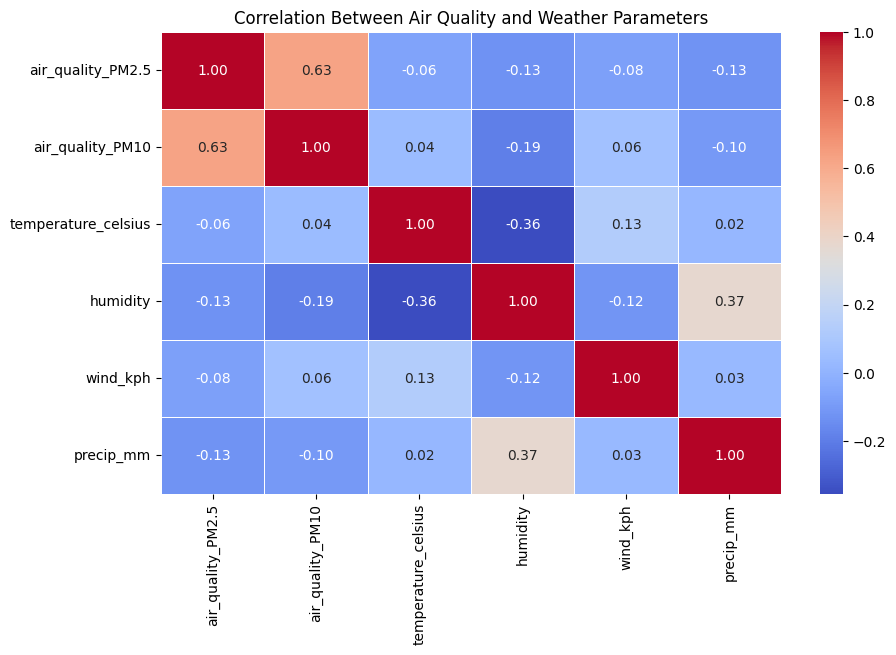

In [10]:

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Air Quality and Weather Parameters")
plt.show()

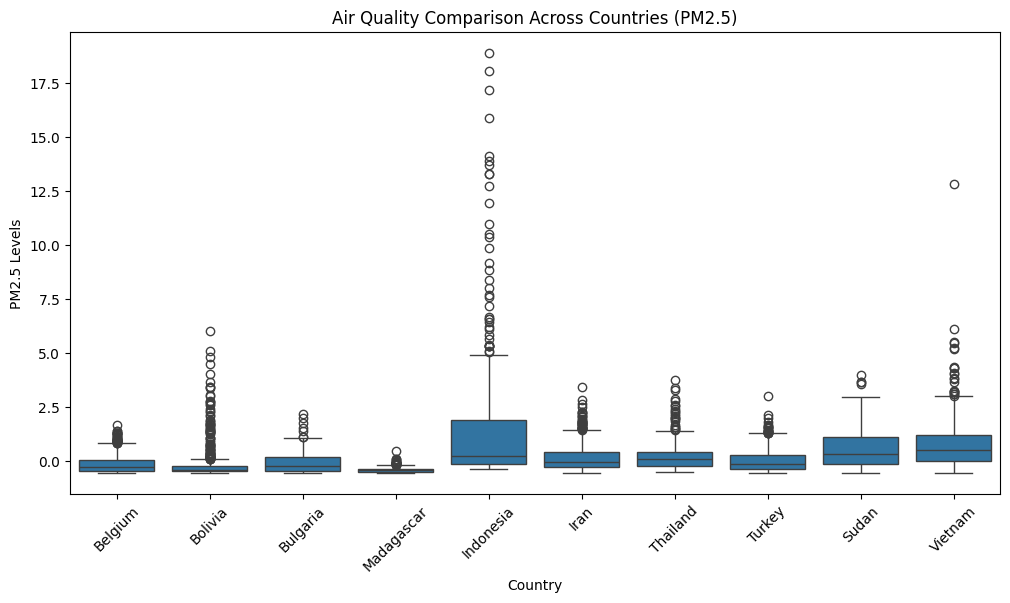

In [12]:
plt.figure(figsize=(12, 6))
top_countries = df_filtered['country'].value_counts().index[:10]
df_filtered_country = df_filtered[df_filtered['country'].isin(top_countries)]
sns.boxplot(x='country', y='air_quality_PM2.5', data=df_filtered_country)
plt.xticks(rotation=45)
plt.title("Air Quality Comparison Across Countries (PM2.5)")
plt.xlabel("Country")
plt.ylabel("PM2.5 Levels")
plt.show()